## Simple Linear Regression

We are going to consider salaries of teachers which based on years of experience.

We'll build a linear regression model to predict 'salary' using 'years of experience' as the predictor variable.


In [57]:
#Let's import some libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

In [58]:
#Read the file
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\Salary.csv")

In [59]:
#First 5 rows of dataset
df.head()

,Years_of_Experience,Salary
0,1,45000
1,10,77300
2,15,85000
3,13,75120
4,12,90000


In [60]:
#Last 5 rows of dataset
df.tail()

,Years_of_Experience,Salary
104,13,95000
105,12,90000
106,2,40000
107,7,82450
108,6,70000


In [61]:
#Shape of dataset
df.shape

(109, 2)

In [62]:
#Information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Years_of_Experience  109 non-null    int64
 1   Salary               109 non-null    int64
dtypes: int64(2)
memory usage: 1.8 KB


In [63]:
#Statistical information about dataset
df.describe()

,Years_of_Experience,Salary
count,109.000000,109.000000
mean,7.954128,70110.321101
std,4.321320,20152.959119
min,1.000000,35000.000000
25%,4.000000,55000.000000
50%,8.000000,70000.000000
75%,12.000000,85230.000000
max,15.000000,105000.000000


In [64]:
#Input----Feature----X
X=df['Years_of_Experience']



#Output---y
y=df['Salary']

In [41]:
print(type(X))
print(type(y))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


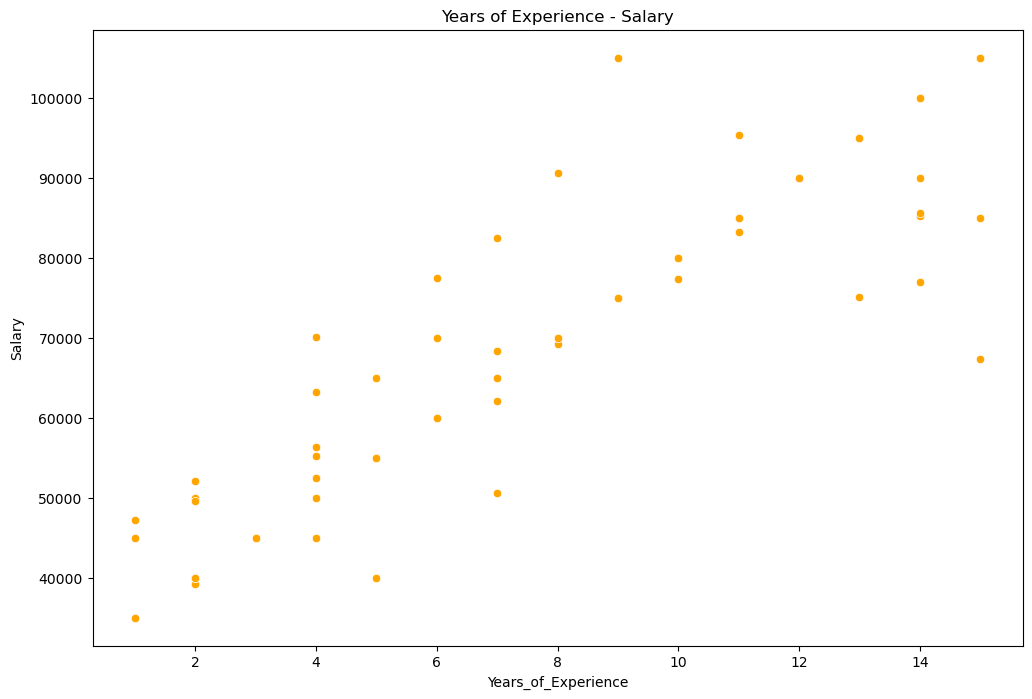

In [67]:
#Let's visualize the dataset
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Years_of_Experience', y='Salary', color='orange')

plt.title('Years of Experience - Salary')
plt.show()

In [68]:
# Type of X and y
print(type(X))
print(type(y))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


## Let's build the model

In [69]:
model=LinearRegression()

In [70]:
#Shape of X and y
X.shape,y.shape

((109,), (109,))

In [71]:
#We need to resize X and y
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [72]:
#Let's check again the shape of X and y
X.shape,y.shape

((109, 1), (109, 1))

## Train Test Split 

Let's split the dataset Train and Test..

%70---Train Data

%30---Test Data

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [74]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((76, 1), (76, 1), (33, 1), (33, 1))

## Run Linear Regression Model 

In [75]:
model.fit(X_train,y_train)

LinearRegression()

## Calculating Coefficients (intercept_, coef_)

$\beta_0$ -> intercept

$\beta_1$ -> slope (coefficient)

In [76]:
model.intercept_

array([35498.91369635])

In [77]:
model.coef_

array([[4404.04985168]])

$$ y = 35498.91 + 4404.04 X $$

## Prediction

In [80]:
y_pred=model.predict(X_test)

In [81]:
#Our prediction
y_pred[0:10]

array([[53115.11310306],
       [66327.26265808],
       [66327.26265808],
       [57519.16295473],
       [48711.06325138],
       [75135.36236143],
       [70731.31250976],
       [97155.61161981],
       [44307.0133997 ],
       [97155.61161981]])

In [82]:
#Test Data
y_test[0:10]

array([[ 50000],
       [ 65000],
       [ 65000],
       [ 55000],
       [ 45000],
       [ 75000],
       [ 70000],
       [100000],
       [ 52110],
       [ 90010]], dtype=int64)

In [83]:
#Shape our prediction and test
print(y_pred.shape)
print(y_test.shape)

(33, 1)
(33, 1)


## Plot Real Data and Prediction Data

Real Label -> y_test

Prediction Label -> y_pred

Input -> X_test

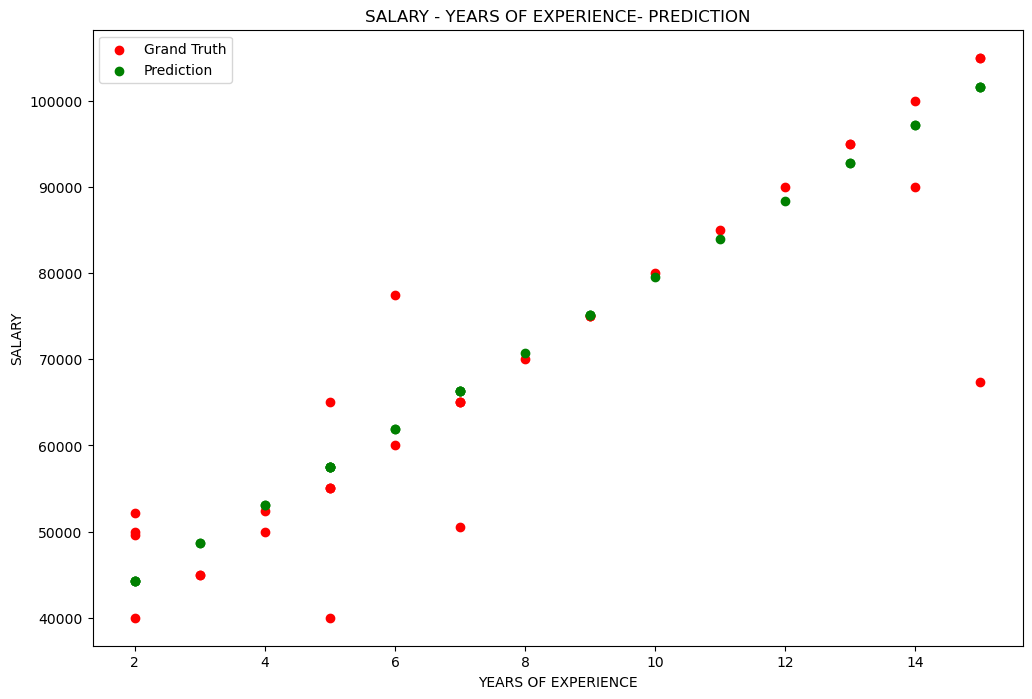

In [84]:
# Real Data -> Grand Truth
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_test, y_test, label='Grand Truth', color='red')

# Prediction
ax.scatter(X_test, y_pred, label='Prediction', color='green')

plt.title('SALARY - YEARS OF EXPERIENCE- PREDICTION')
plt.xlabel('YEARS OF EXPERIENCE')
plt.ylabel('SALARY')
plt.legend(loc='upper left')
plt.show()

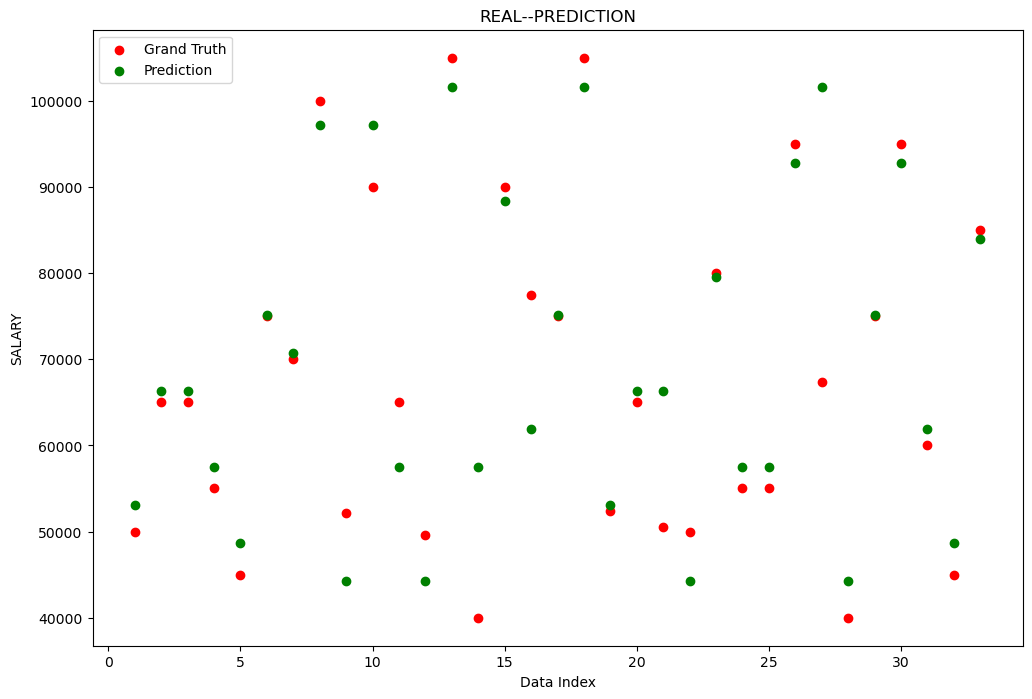

In [85]:
#Let's see the change in each prediction point
indexs=range(1,34)

# Real Data -> Grand Truth
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(indexs, y_test, label='Grand Truth', color='red')

# Prediction
ax.scatter(indexs, y_pred, label='Prediction', color='green')

plt.title('REAL--PREDICTION')
plt.xlabel('Data Index')
plt.ylabel('SALARY')
plt.legend(loc='upper left')
plt.show()

## Let's Draw Errors ($y - \hat y$)

Error : Residual -> ($y - \hat y$)

**y_test - y_pred**

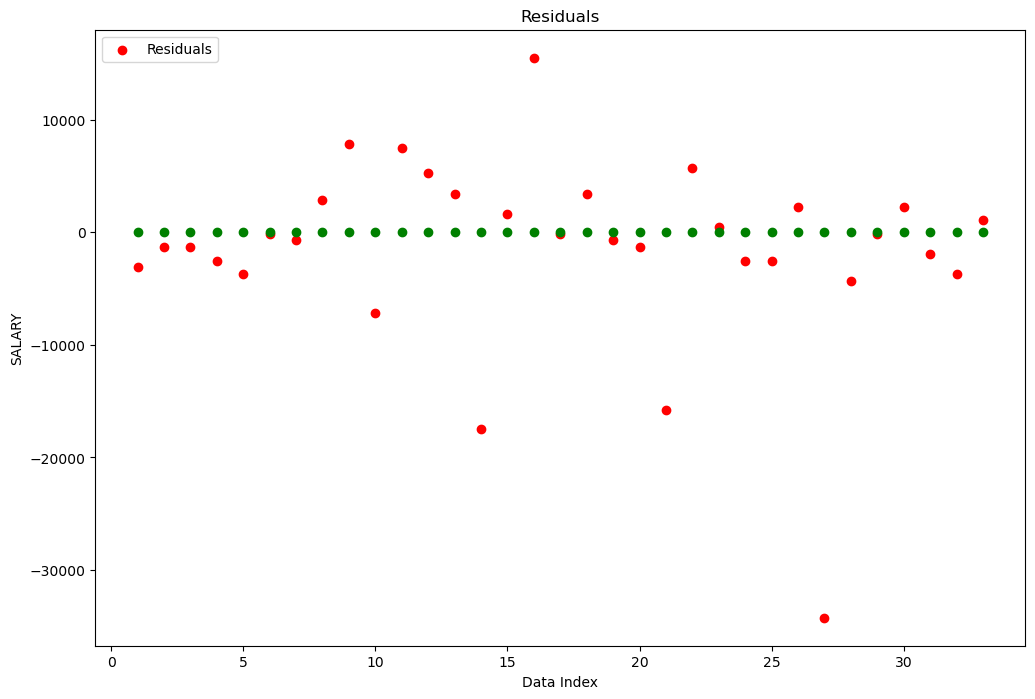

In [88]:
#Let's see the error in each prediction point
indexs=range(1,34)

# Residuals
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(indexs, y_test-y_pred, label='Residuals', color='red')

# The zero line
ax.scatter(indexs, np.zeros(33), color='green')

plt.title('Residuals')
plt.xlabel('Data Index')
plt.ylabel('SALARY')
plt.legend(loc='upper left')
plt.show()

## Accuracy of model (RMSE, ve $R^2$)

**RMSE**: Root Mean Squared Error

Square root of MSE

$R^2$: `coefficient of determination`.

In [92]:
#Let's calculate R^s
r_2=r2_score(y_test,y_pred)
print('R^2 %:',r_2*100)

R^2 %: 80.41141992921268


In [93]:
#Let's calculate MSE
MSE=mean_squared_error(y_test,y_pred)
print('MSE:',MSE)

MSE: 70526565.50323258


In [94]:
#Let's calculate RMSE
RMSE=math.sqrt(MSE)
print('RMSE:',RMSE)

RMSE: 8398.009615571573


## Interpretations

**$R^2$ = 80.41%**

This means:

Our model represents 80.41% of real data.

**RMSE = 8398**


This means:

Our model makes an error of 8398 on average when estimating.